## Oppstart

### Preamble

Contains imports and some utility code.

In [1]:
from dhlab.module_update import update, css, code_toggle

In [2]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
css()

In [5]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Define a corpus

Bruk gjerne Dewey eller temaord for å definere korpuset, hold det forholdsvis lite rundt 200 bøker.

In [7]:
collword = 'skalldyr'

In [8]:
korpus = nb.book_urn(words=[collword], ddk='8%', period=(1960, 2020), limit=500)
len(korpus)

500


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [9]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2011021508128,"Rice, Luanne",glimt av paradiset,1996
1,2013042206103,"Riley, John Erik",Heimdal (California),2010
2,2016041408011,"Reason, Joyce",Tvillingene,1976
3,2010111205061,"Hambræus, Axel",Tårnvaktens datter,1960
4,2007052101032,"Carpentier, Alejo",Eksplosjon i katedralen,1965
5,2008071504064,"Bonde, Heidi",Flamingohøsten har begynt,1997
6,2014101508030,"McDermid, Val",Gravmerket,2007
7,2013062608047,"Hansl, Arthur",Mord i Hollywood,1985
8,2008030704043,"Despard, Annabelle",Fisken tenker sitt,1995
9,2008011100009,"Lander, Leena",Svarte sommerfugler,1993


In [10]:
nb.urn_concordance(word='hvitvin', urns=korpus)

"glimt av paradiset, Rice, Luanne, 1996","kagge whiskey , en kasse",hvitvin,og to liter rom .
"Flamingohøsten har begynt, Bonde, Heidi, 1997",å huske at jeg liker,hvitvin,. Da jeg hadde bestemt
"Flamingohøsten har begynt, Bonde, Heidi, 1997",bestemt meg for å kjøpe,hvitvin,", oppdaget jeg at det"
"Gravmerket, McDermid, Val, 2007",. Hun bestilte et glass,hvitvin,av en servitrise som gikk
"Gravmerket, McDermid, Val, 2007",Harry kom med et glass,hvitvin,til henne og satte seg
"Mord i Hollywood, Hansl, Arthur, 1985",krabber og sverdfisk og drakk,hvitvin,". Eieren , en tykk"
"Alle Dubins liv, Malamud, Bernard, 1981","med omelett , salat ,",hvitvin,", spurte Fanny hvor han"
"Alle Dubins liv, Malamud, Bernard, 1981","asparges , en laksesalat ,",hvitvin,. De spiste ved spisestuebordet
"Mellom sommerens lengsel og vinterens kulde, Persson, Leif G.W., 2005",", mens Sarah drakk californisk",hvitvin,og pratet og smilte praktisk
"gylne appelsin, Wambaugh, Joseph, 1993",ikke engang et glass,hvitvin,. Hun bestilte en dobbel
"Grav for en ukjent, Cornwell, Patricia D., 1996",« Bestilte han bare,hvitvin,? » sa jeg .


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [11]:
small_window = 5
large_window = 10

In [12]:
def collpart(collword, urns, win = 5, limit = 10000):
    return nb.urn_coll(collword, urns = korpus, after = win, before = win, limit = 10000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [13]:
small = collpart(collword, nb.pure_urn(korpus), win = 5)
large = collpart(collword, nb.pure_urn(korpus), win = 10)



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(small)
nb.normalize_corpus_dataframe(large)

Inspiser dataene etter normalisering

### Kollokasjonen

In [14]:
small.head()

,0
",",536
og,458
.,371
av,160
med,154


In [15]:
large.head()

,0
",",948
.,780
og,676
i,277
av,261


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [16]:
delta = pd.DataFrame()

In [17]:
delta['small'] = small[0]
delta['large'] = large[0]

In [18]:
delta['ratio'] = small[0]/large[0]

In [19]:
#delta['log'] = np.log(delta['ratio'])

In [20]:
#delta['score'] = delta['ratio'] * delta['log']

In [21]:
delta[(delta['small'] > 2) & (delta['ratio'] > 0.6)].sort_values(by='ratio', ascending=False)

,small,large,ratio
Beech,4,4,1.000000
større,5,5,1.000000
grillede,3,3,1.000000
dannet,3,3,1.000000
grasstrå,3,3,1.000000
...,...,...,...
uten,10,16,0.625000
Hun,24,39,0.615385
eller,43,70,0.614286
av,160,261,0.613027


In [22]:
delta.loc[[',','.','og','!', '?']]

,small,large,ratio
",",536,948,0.565401
.,371,780,0.475641
og,458,676,0.677515
!,8,20,0.400000
?,51,106,0.481132


In [23]:
delta_max = delta[delta.small < delta.large][delta.small > 0][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [24]:
delta_const = delta[delta.small > 2][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [25]:
delta_max.head(20)

,small,large,ratio
fisk,127,139,0.913669
døde,10,11,0.909091
hvitvin,8,9,0.888889
ofte,7,8,0.875000
hjerte,7,8,0.875000
brød,7,8,0.875000
allergisk,14,16,0.875000
plukket,6,7,0.857143
elsker,6,7,0.857143
sand,6,7,0.857143


In [26]:
delta_const

,small,large,ratio
Beech,4,4,1.000000
større,5,5,1.000000
grillede,3,3,1.000000
dannet,3,3,1.000000
grasstrå,3,3,1.000000
...,...,...,...
uten,10,16,0.625000
Hun,24,39,0.615385
eller,43,70,0.614286
av,160,261,0.613027


In [27]:
delta_max.head(50).index

Index(['fisk', 'døde', 'hvitvin', 'ofte', 'hjerte', 'brød', 'allergisk',
       'plukket', 'elsker', 'sand', 'lignet', 'samlet', 'fat', 'beste', 'Fisk',
       ')', 'kasser', 'frem', 'krabber', 'kjente', 'skjell', 'under',
       'grønnsaker', 'spiste', 'Særlig', 'eksempel', 'hvert', 'mente',
       'navnet', 'spiser', 'sine', 'mot', 'etter', 'synes', 'mest', 'Der',
       'levd', 'mer', 'byens', 'kaviar', 'friske', 'besto', 'inntok',
       'kelneren', 'blekksprut', 'ris', 'muslinger', 'bløtdyr', 'suppe',
       'eneste'],
      dtype='object')

In [28]:
delta_const.head(50).index

Index(['Beech', 'større', 'grillede', 'dannet', 'grasstrå', 'hauger', 'løk',
       'brett', 'magen', 'Hvert', 'hårete', 'tatt', 'hvitt', 'Østers', 'toget',
       'tilsendt', 'sval', 'lunsj', 'luktet', 'kreps', 'kjenne', 'arbeidet',
       'kanalene', 'Spicer', 'plukke', 'sjøgress', 'fisker', 'liker', 'kurver',
       'svømte', 'kloakk', 'havabbor', '124', 'Kjenner', 'god', 'MOREN',
       'ennå', 'Åndløse', 'generasjoner', 'dobbelt', 'sitt', 'fanget', 'fullt',
       'fatt', 'Noen', 'dykke', 'Skallene', 'slapp', 'barbent', 'tusener'],
      dtype='object')

# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

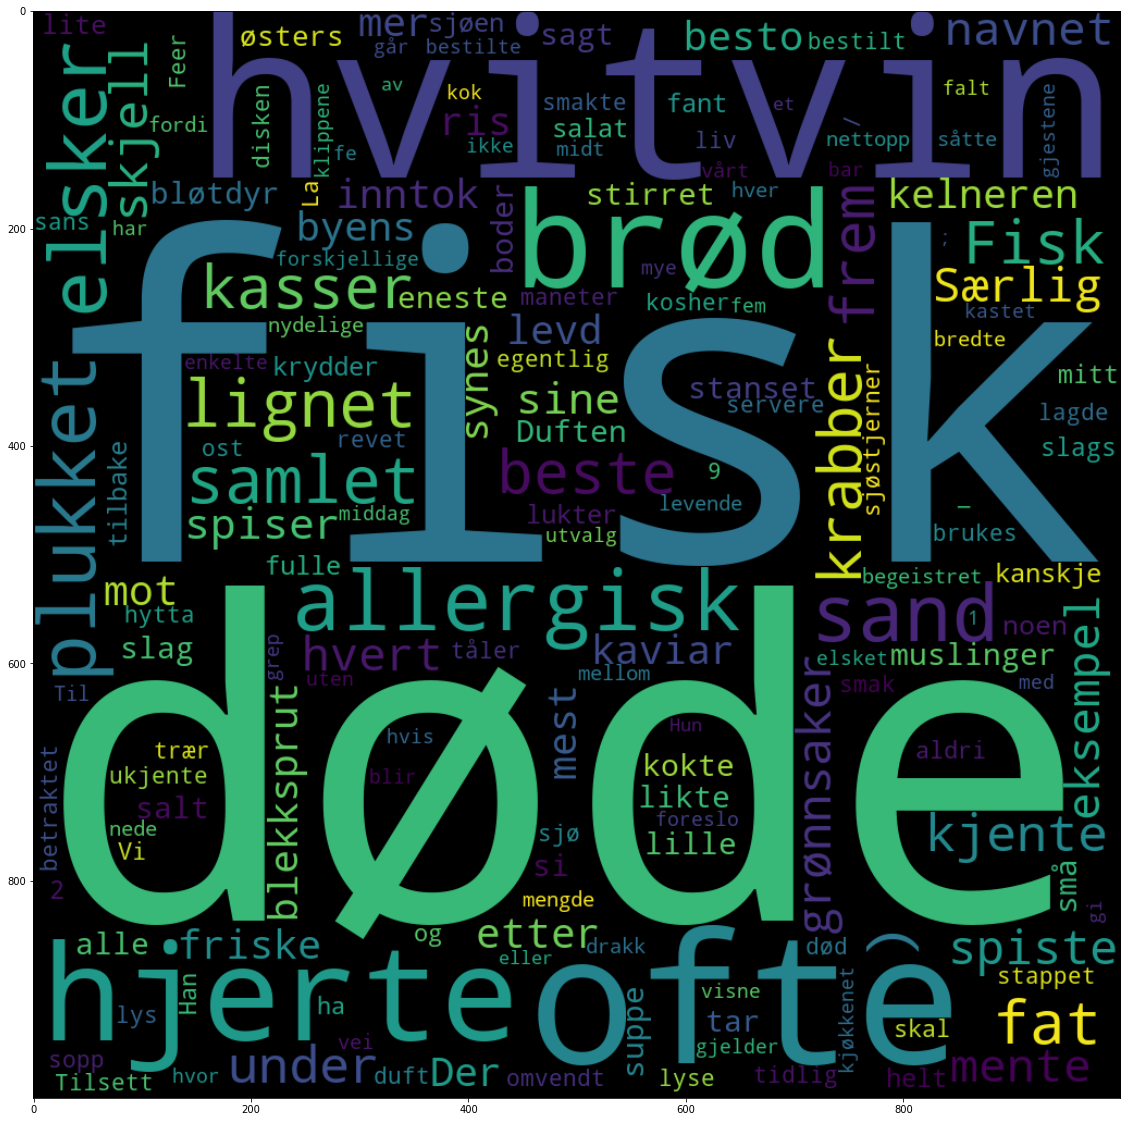

In [29]:
nb.cloud(nb.frame(delta_max.ratio))

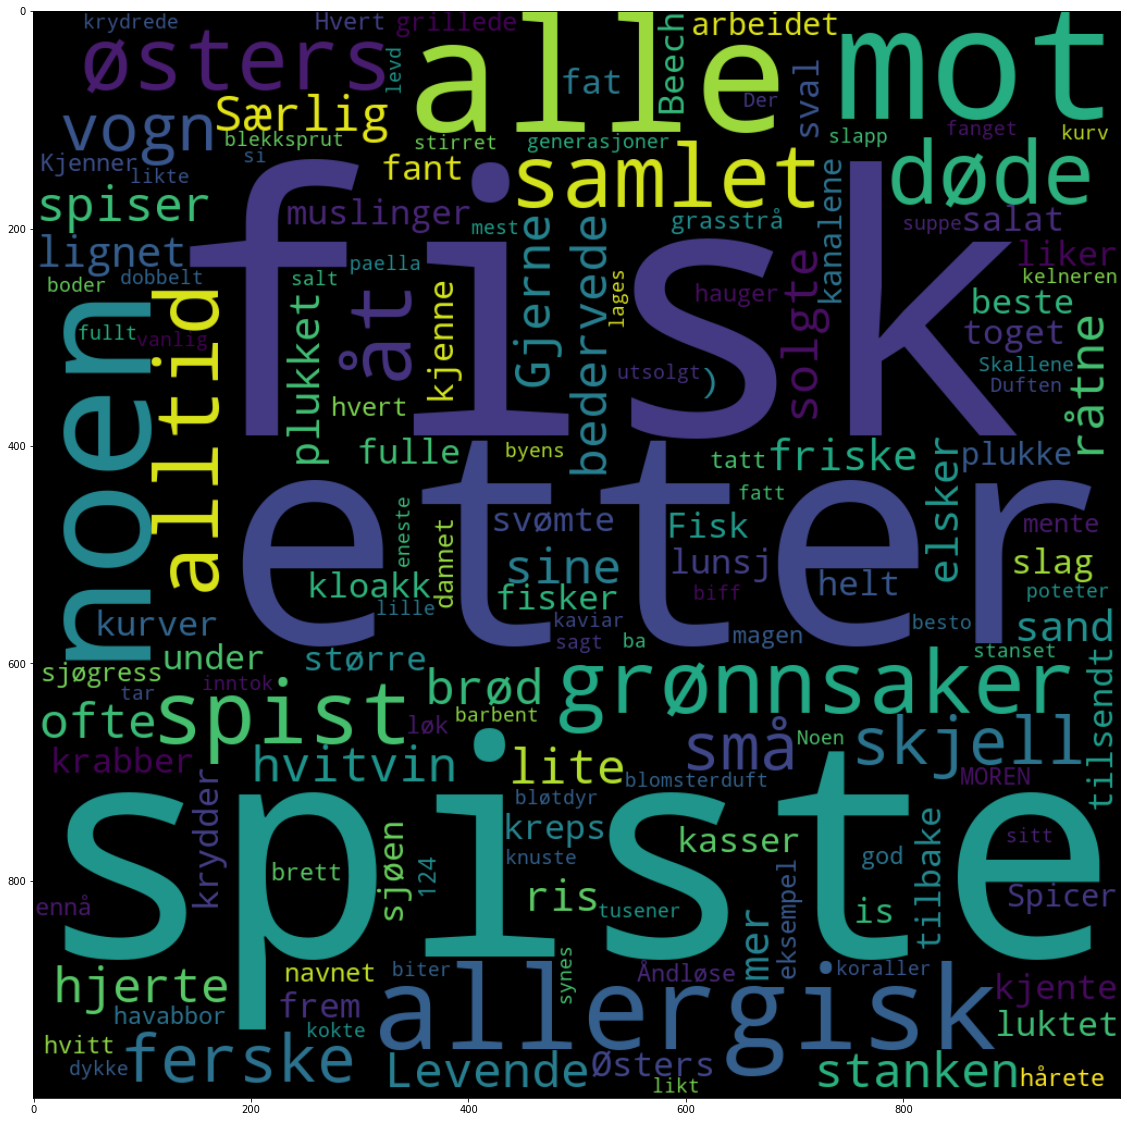

In [30]:
nb.cloud(nb.frame(delta_const.head(150).small/delta_const.small.sum()))